In [1]:
import pyforest
import os
import numpy as np # linear algebra
import pandas as pd # data processing

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# checking duplicated row

df.duplicated().sum()

0

In [5]:
# Checking the target data balancing

df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Seems like have an imbalance classification

In [6]:
# Checking the geographical data balancing

df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
# Checking the geographical data balancing

df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
# Removing unneccessary columns

df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Performing One Hot Encoding

df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
# Dividing the data in to Train - Test

X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
# Doing scaling before training Neural Network

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [14]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [15]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_train_trf.shape

(8000, 11)

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [18]:
# Creating sequential model object
model = Sequential() 

# Now adding layers in to it ( 1 input player, 1 output layer, 1 hidden layer)
# We will keep 3 nodes or perceptron in the hidden layer
model.add(Dense(3, activation = 'sigmoid', input_dim=11)) # because we have 11 input columns
# now adding the output layer
model.add(Dense(1, activation = 'sigmoid')) 


In [19]:
# Checking the summary of the model]

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(loss= 'binary_crossentropy', optimizer ='Adam')

In [21]:
model.fit(X_train_trf, y_train, epochs=10)

Epoch 1/10
250/250 [==============================] - 0s 526us/step - loss: 0.5428
Epoch 2/10
250/250 [==============================] - 0s 484us/step - loss: 0.4901
Epoch 3/10
250/250 [==============================] - 0s 476us/step - loss: 0.4670
Epoch 4/10
250/250 [==============================] - 0s 477us/step - loss: 0.4531
Epoch 5/10
250/250 [==============================] - 0s 475us/step - loss: 0.4438
Epoch 6/10
250/250 [==============================] - 0s 479us/step - loss: 0.4375
Epoch 7/10
250/250 [==============================] - 0s 482us/step - loss: 0.4331
Epoch 8/10
250/250 [==============================] - 0s 477us/step - loss: 0.4300
Epoch 9/10
250/250 [==============================] - 0s 553us/step - loss: 0.4277
Epoch 10/10
250/250 [==============================] - 0s 688us/step - loss: 0.4260


In [22]:
# getting weights in the first layers and 3 biases as it was ( 11 x 3 + 3 Biases)
model.layers[0].get_weights()

[array([[-0.22234054, -0.16795027,  0.3557039 ],
        [ 0.47842738, -0.8956834 , -1.7501436 ],
        [-0.4131918 , -0.16044086,  0.27125502],
        [ 0.308182  , -0.33110306, -0.1190772 ],
        [-0.1123414 , -0.01298378,  0.16143836],
        [ 0.10234454,  0.06380939,  0.03125088],
        [-1.0600258 ,  0.40986723,  0.44577557],
        [ 0.19891196, -0.07793658,  0.11627408],
        [ 0.52752715, -0.5197223 , -0.19211192],
        [-0.00366719,  0.02346475, -0.08894725],
        [-0.83047616,  0.36628836,  0.06201775]], dtype=float32),
 array([-0.30731812,  0.2920369 ,  0.35175124], dtype=float32)]

In [23]:
# getting weights in the second layers and 1 bias as it was ( 1 x 3 + 1 Bias)
model.layers[1].get_weights()

[array([[ 0.7865626],
        [-1.6809968],
        [-1.3368347]], dtype=float32),
 array([-0.25071922], dtype=float32)]

In [24]:
# Prediction

y_log = model.predict(X_test_trf)
y_log

63/63 [==============================] - 0s 1ms/step


array([[0.22088434],
       [0.33997667],
       [0.15283853],
       ...,
       [0.19391684],
       [0.12076008],
       [0.20206775]], dtype=float32)

In [25]:
# deciding thresold value as 0.5 -- ( to get proper thresold we have to calculate through ROC, AUC)

y_pred =  np.where(y_log > 0.5 , 1, 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [26]:
# checking the accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)*100

81.35

# we can change in neural network to improve the accuracy score

1. epochs we can increase
2. activation function we can keep ReLu in Hidden Layers
3. No of nodes increase in hidden Layers
4. No of layers increase -- ( Don't add more it may overfit)

In [27]:
# Tuning the model  --- # activation can be relu also

model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11)) 
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100


128/128 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.6247 - val_loss: 0.5331 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 923us/step - loss: 0.5143 - accuracy: 0.7958 - val_loss: 0.5028 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 871us/step - loss: 0.5049 - accuracy: 0.7958 - val_loss: 0.5014 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 811us/step - loss: 0.5042 - accuracy: 0.7958 - val_loss: 0.5009 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 924us/step - loss: 0.5037 - accuracy: 0.7958 - val_loss: 0.5002 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.7958 - val_loss: 0.4996 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 984us/step - loss: 0.5030 - accuracy: 0.7958 - val_loss: 0.4992 - val_accuracy: 0.7969
E

In [31]:
model.layers[0].get_weights()

[array([[-0.08297484, -0.45972043,  0.01721513,  0.37147456,  0.40336356,
          0.05611323,  0.5328159 , -0.4474145 ,  0.47025385,  0.1785245 ,
          0.5458083 ],
        [ 0.49950704,  0.01529717,  0.2542013 , -0.38095072,  0.01058896,
         -0.51145697, -0.06281839,  0.19317555,  0.23614563,  0.09355683,
          0.009461  ],
        [-0.14300193,  0.1693781 , -0.04948178, -0.3055044 , -0.3954566 ,
         -0.35397205,  0.50295115,  0.02629751,  0.59566265,  0.27247244,
          0.51420295],
        [ 0.04402018, -0.5169698 ,  0.00360769, -0.16371799, -0.05794866,
          0.290448  , -0.39056993, -0.36415577, -0.42110926, -0.36870036,
         -0.00164848],
        [ 0.7607366 ,  0.2345255 , -0.3350692 , -0.06895617, -0.11496902,
          0.17831512, -0.397846  , -0.23330453,  0.39892888,  0.43548208,
         -0.21554445],
        [ 0.3257857 ,  0.37811595,  0.04210484, -0.5144302 ,  0.00186473,
          0.11855207, -0.40821022,  0.19385755, -0.22401145,  0.4948305

In [32]:
model.layers[1].get_weights()

[array([[ 1.8943468e-01, -2.4185665e-01,  2.5450632e-01, -2.2437319e-01,
          1.2009080e-01, -6.3845074e-01, -1.2799527e-03, -5.1339781e-01,
          3.8268611e-01,  9.6200325e-02,  1.7017935e-01],
        [ 2.9663181e-01, -2.6229557e-01,  3.3725625e-01,  1.9083977e-01,
          3.6557120e-01, -4.4593531e-01, -8.5467696e-03, -1.6571054e-01,
          2.6487517e-01, -4.7877708e-01, -4.8415381e-01],
        [-4.9929282e-01, -2.9832411e-01,  2.3525145e-02, -2.0609696e-01,
         -3.0050367e-01,  1.7668918e-01, -4.6393088e-01,  3.7112415e-01,
          3.0325645e-01, -3.1760359e-01,  4.6281372e-03],
        [-6.8626726e-01,  9.8439127e-01,  1.4167143e-01,  6.6141236e-01,
          2.5578216e-01, -9.0538037e-01, -9.3828589e-01, -1.1259863e-01,
          1.0037740e+00,  4.5622391e-01, -8.6542897e-02],
        [-1.2324741e-01,  4.4766554e-01,  6.6250563e-02, -2.3027408e-01,
          3.8546035e-01,  2.7636418e-01, -5.5669069e-01,  2.0159999e-01,
          4.9152628e-01, -1.2390272e-0

In [33]:
model.layers[2].get_weights()

[array([[ 0.28413388],
        [-0.47283274],
        [-0.67922044],
        [-0.7109739 ],
        [-0.91910106],
        [ 0.3525464 ],
        [ 0.19592398],
        [ 0.42547384],
        [-0.38844243],
        [ 0.07403712],
        [ 0.17669798]], dtype=float32),
 array([-0.16480744], dtype=float32)]

In [34]:
y_log = model.predict(X_test_trf)
y_log

 1/63 [..............................] - ETA: 2s

63/63 [==============================] - 0s 718us/step


array([[0.14045617],
       [0.20085973],
       [0.08562707],
       ...,
       [0.14190486],
       [0.09080778],
       [0.10543626]], dtype=float32)

In [35]:
# deciding thresold value as 0.5 -- ( to get proper thresold we have to calculate through ROC, AUC)

y_pred =  np.where(y_log > 0.5 , 1, 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [36]:
accuracy_score(y_test, y_pred)*100

79.75

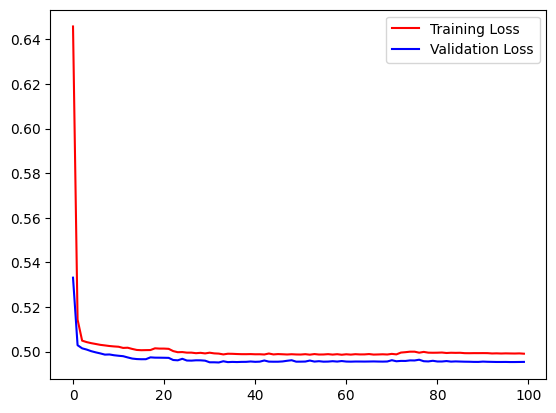

In [43]:
import matplotlib.pyplot as plt

# Assuming you have a 'history' object with 'loss' and 'val_loss' information

plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')

plt.legend()
plt.show()


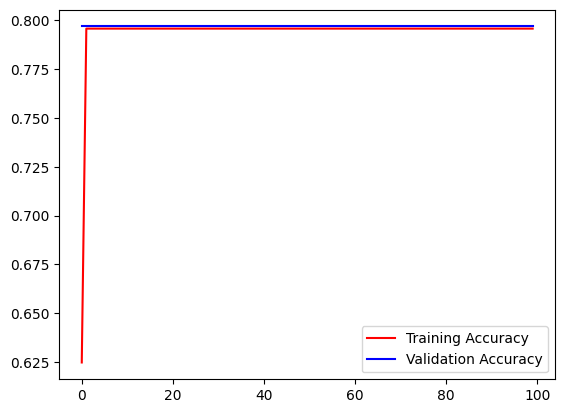

In [44]:
plt.plot(history.history['accuracy'], color= 'red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color= 'blue', label='Validation Accuracy')

plt.legend()
plt.show()